In [41]:
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mapclassify as mc
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.dpi'] = 160
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mapclassify as mc
import spreg
%matplotlib inline

In [2]:
boundaries_fp='../Data/ProjectData/geo_export.shp'
boundaries=gpd.read_file(boundaries_fp)

ecodata15=pd.read_csv('../Data/ProjectData/econ15.csv')
# ecodata16=pd.read_csv('../Data/ProjectData/econ16.csv')
# ecodata17=pd.read_csv('../Data/ProjectData/econ17.csv')
# ecodata18=pd.read_csv('./data/econ/econ18.csv')

ecodata15.loc[ecodata15[ecodata15['GEOG']=='O\'Hare'].index,'GEOG']='ohare'
# ecodata16.loc[ecodata16[ecodata16['GEOG']=='O\'Hare'].index,'GEOG']='ohare'
# ecodata17.loc[ecodata17[ecodata17['GEOG']=='O\'Hare'].index,'GEOG']='ohare'
# ecodata18.loc[ecodata18[ecodata18['GEOG']=='O\'Hare'].index,'GEOG']='ohare'

ecodata15.loc[ecodata15[ecodata15['GEOG']=='The Loop'].index,'GEOG']='loop'
# ecodata16.loc[ecodata16[ecodata16['GEOG']=='The Loop'].index,'GEOG']='loop'
# ecodata17.loc[ecodata17[ecodata17['GEOG']=='The Loop'].index,'GEOG']='loop'
# # ecodata18.loc[ecodata18[ecodata18['GEOG']=='The Loop'].index,'GEOG']='loop'


boundaries['GEOG']=boundaries['community'].str.lower()
ecodata15['GEOG']=ecodata15['GEOG'].str.lower()
# ecodata16['GEOG']=ecodata15['GEOG'].str.lower()
# ecodata17['GEOG']=ecodata15['GEOG'].str.lower()
# ecodata18['GEOG']=ecodata15['GEOG'].str.lower()

ecodata15=boundaries.merge(ecodata15, how='left',left_on='GEOG',right_on='GEOG').set_index('GEOG')

In [51]:
libraries=gpd.read_file('../Data/ProjectData/libraries.csv')
parks=gpd.read_file('../Data/ProjectData/parks.csv')

In [4]:
def string_to_points(point):
    #Remove bracketsfrom shapely.geometry import Point
    point = point.replace ("(", "")
    point = point.replace (")", "")

    #Parse the location string
    loc = point.split (',')

    #Returns tuple
    return Point(float (loc[1]), float (loc[0]))

In [56]:
libraries.head()

,NAME,HOURS OF OPERATION,CYBERNAVIGATOR,TEACHER IN THE LIBRARY,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry,GEOG
0,Albany Park,"M, W: 10AM-6PM; TU, TH: 12PM-8PM; F, SA: 9AM-...",Yes,Yes,3401 W. Foster Avenue,CHICAGO,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.975456, -87.71409)",POINT (-87.71409 41.97546),north park
1,Altgeld,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",Yes,Yes,13281 S. Corliss Avenue,CHICAGO,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65473021837776, -87.6022302609835)",POINT (-87.60223 41.65473),riverdale
2,Archer Heights,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",No,Yes,5055 S. Archer Avenue,CHICAGO,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.8012136599335, -87.72649071431441)",POINT (-87.72649 41.80121),archer heights
3,Austin,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",Yes,Yes,5615 W. Race Avenue,CHICAGO,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.889272153514526, -87.76571186722818)",POINT (-87.76571 41.88927),austin
4,Austin-Irving,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",No,Yes,6100 W. Irving Park Road,CHICAGO,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95317390064158, -87.77938682073541)",POINT (-87.77939 41.95317),portage park


In [53]:
parks.head()

,the_geom,OBJECTID_1,PARK,PARK_NO,FACILITY_N,FACILITY_T,X_COORD,Y_COORD,GISOBJID,geometry
0,POINT (-87.63769762610757 41.76299921150787),1,HAMILTON (ALEXANDER),9,CULTURAL CENTER,SPECIAL,-87.63769763,41.76299921,2494,None
1,POINT (-87.63792902986378 41.76281652413111),2,HAMILTON (ALEXANDER),9,GYMNASIUM,INDOOR,-87.63792903,41.76281652,2495,None
2,POINT (-87.63691359952075 41.76084939012162),3,HAMILTON (ALEXANDER),9,BASEBALL JR/SOFTBALL,OUTDOOR,-87.6369136,41.76084939,2496,None
3,POINT (-87.63832013450008 41.76200535623585),4,HAMILTON (ALEXANDER),9,BASEBALL JR/SOFTBALL,OUTDOOR,-87.63832013,41.76200536,2497,None
4,POINT (-87.63805916836576 41.76047384589964),5,HAMILTON (ALEXANDER),9,BASEBALL JR/SOFTBALL,OUTDOOR,-87.63805917,41.76047385,2498,None


In [57]:
libraries['geometry']=libraries['LOCATION'].apply(string_to_points)
parks['geometry']=parks.apply(lambda x:Point(x.X_COORD,x.Y_COORD),axis=1)

In [12]:
community_dict={}

for i in range(boundaries.shape[0]):
    community_dict[boundaries.iloc[i]['GEOG']]=boundaries.iloc[i]['geometry']
    
def find_comm_for_location(row):
#     print(row)
    for comm,poly in enumerate(community_dict):
        if community_dict[poly].contains(row['geometry']):
            return poly

In [58]:
libraries['GEOG']=libraries.apply(find_comm_for_location,axis=1)
parks['GEOG']=parks.apply(find_comm_for_location,axis=1)

In [15]:
libraries.head()

,NAME,HOURS OF OPERATION,CYBERNAVIGATOR,TEACHER IN THE LIBRARY,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry,GEOG
0,Albany Park,"M, W: 10AM-6PM; TU, TH: 12PM-8PM; F, SA: 9AM-...",Yes,Yes,3401 W. Foster Avenue,CHICAGO,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.975456, -87.71409)",POINT (-87.71409 41.97546),north park
1,Altgeld,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",Yes,Yes,13281 S. Corliss Avenue,CHICAGO,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65473021837776, -87.6022302609835)",POINT (-87.60223 41.65473),riverdale
2,Archer Heights,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",No,Yes,5055 S. Archer Avenue,CHICAGO,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.8012136599335, -87.72649071431441)",POINT (-87.72649 41.80121),archer heights
3,Austin,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",Yes,Yes,5615 W. Race Avenue,CHICAGO,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.889272153514526, -87.76571186722818)",POINT (-87.76571 41.88927),austin
4,Austin-Irving,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",No,Yes,6100 W. Irving Park Road,CHICAGO,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95317390064158, -87.77938682073541)",POINT (-87.77939 41.95317),portage park


In [59]:
libraries_agg=pd.DataFrame({'libraries':libraries[['GEOG']].groupby(['GEOG']).size()})
parks_agg=pd.DataFrame({'parks':parks[['GEOG']].groupby(['GEOG']).size()})

In [60]:
parks_agg

,parks
GEOG,
albany park,31
archer heights,42
armour square,27
ashburn,57
auburn gresham,84
...,...
west lawn,20
west pullman,67
west ridge,137


In [61]:
ecodata15=ecodata15.merge(parks_agg, how='left',on='GEOG')

In [31]:
ecodata15=ecodata15.merge(libraries_agg, how='left',on='GEOG')

In [34]:
ecodata15=ecodata15.fillna(0)


/tmp/ipykernel_1412124/2066632186.py:1: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  ecodata15=ecodata15.fillna(0)


/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


Text(0.5, 1.0, 'Libraries by community')

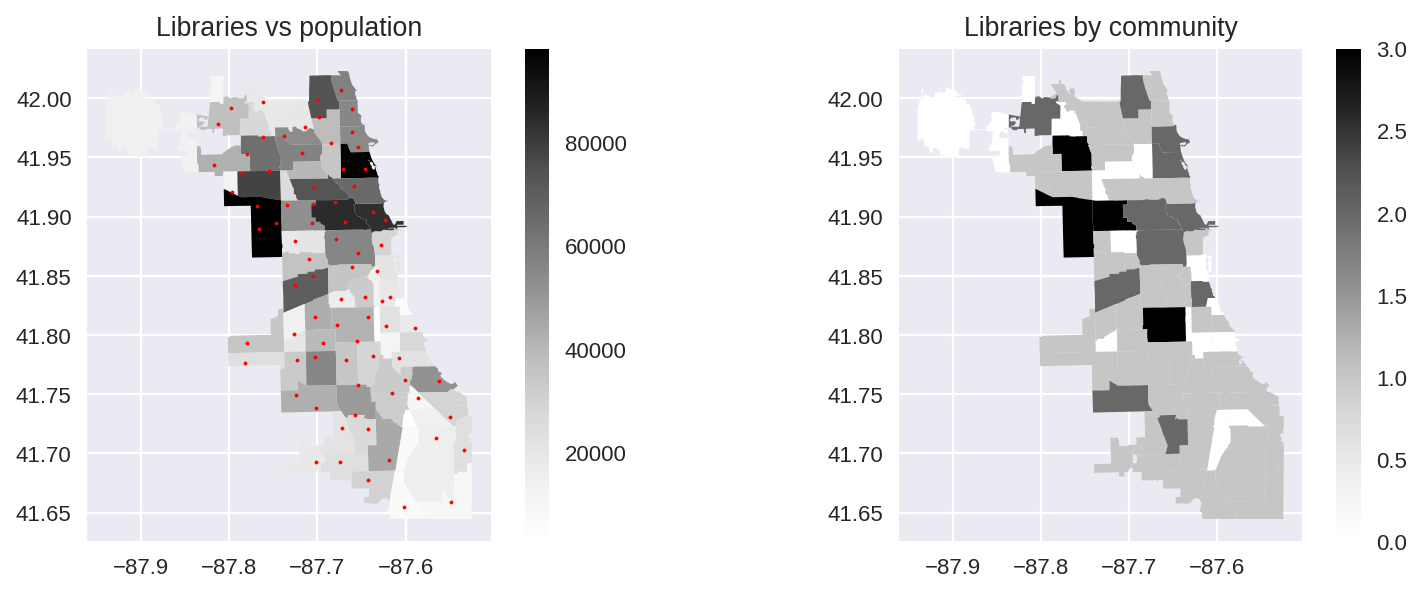

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0
libraries.plot(color='r',markersize=2,zorder=2, ax=axs[i])
ecodata15.plot(column='TOT_POP',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Libraries vs population')

i=1
ecodata15.plot(column='libraries',legend=True, ax=axs[i])
axs[i].set_title('Libraries by community')



/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


Text(0.5, 1.0, 'Parks by community')

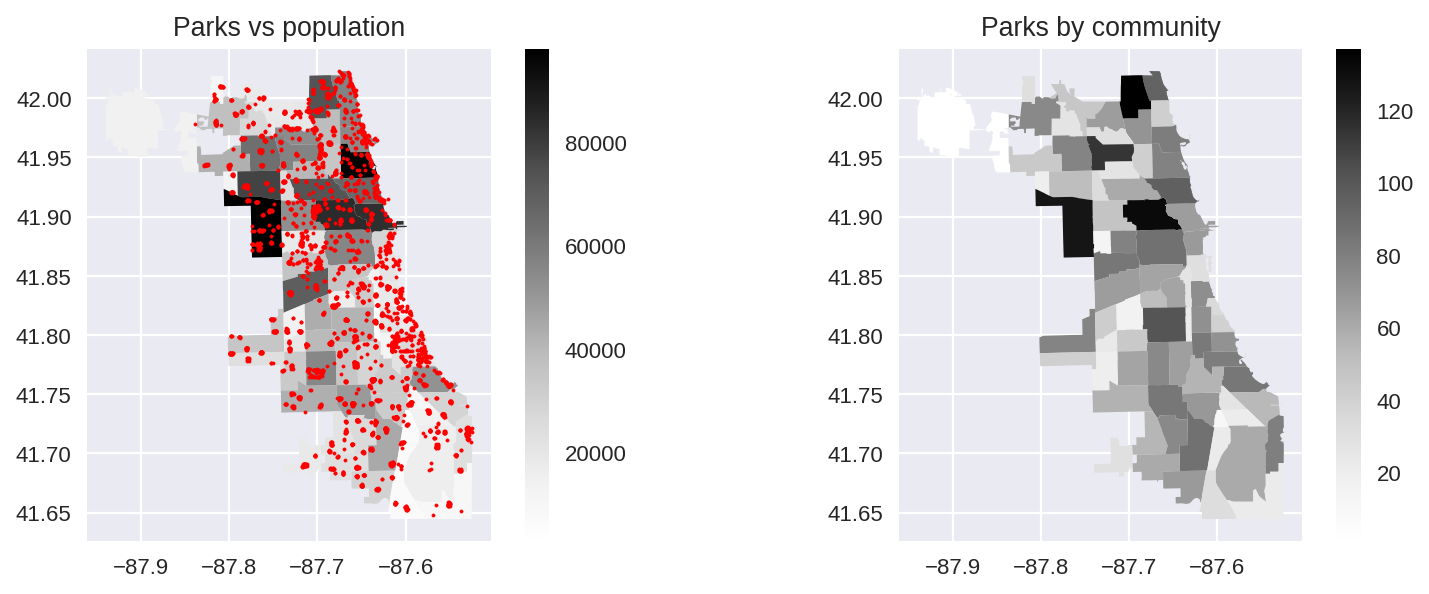

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0
parks.plot(color='r',markersize=2,zorder=2, ax=axs[i])
ecodata15.plot(column='TOT_POP',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Parks vs population')

i=1
ecodata15.plot(column='parks',legend=True, ax=axs[i])
axs[i].set_title('Parks by community')



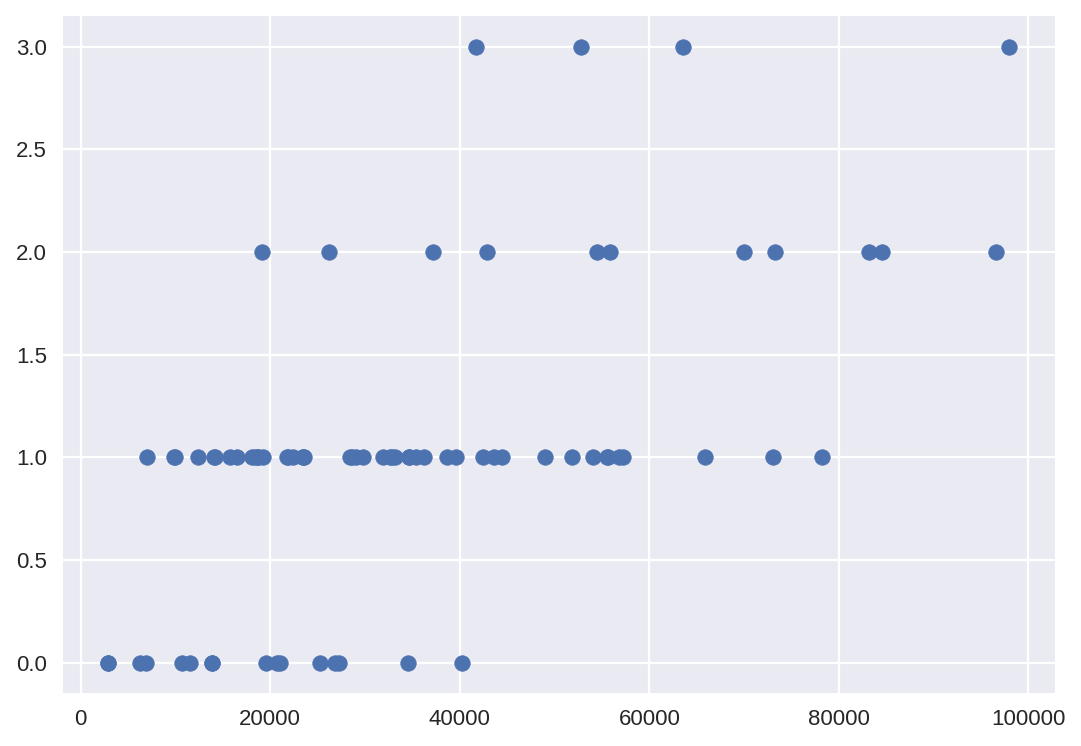

In [44]:
plt.scatter(ecodata15[['TOT_POP']].values,ecodata15['libraries'].values)

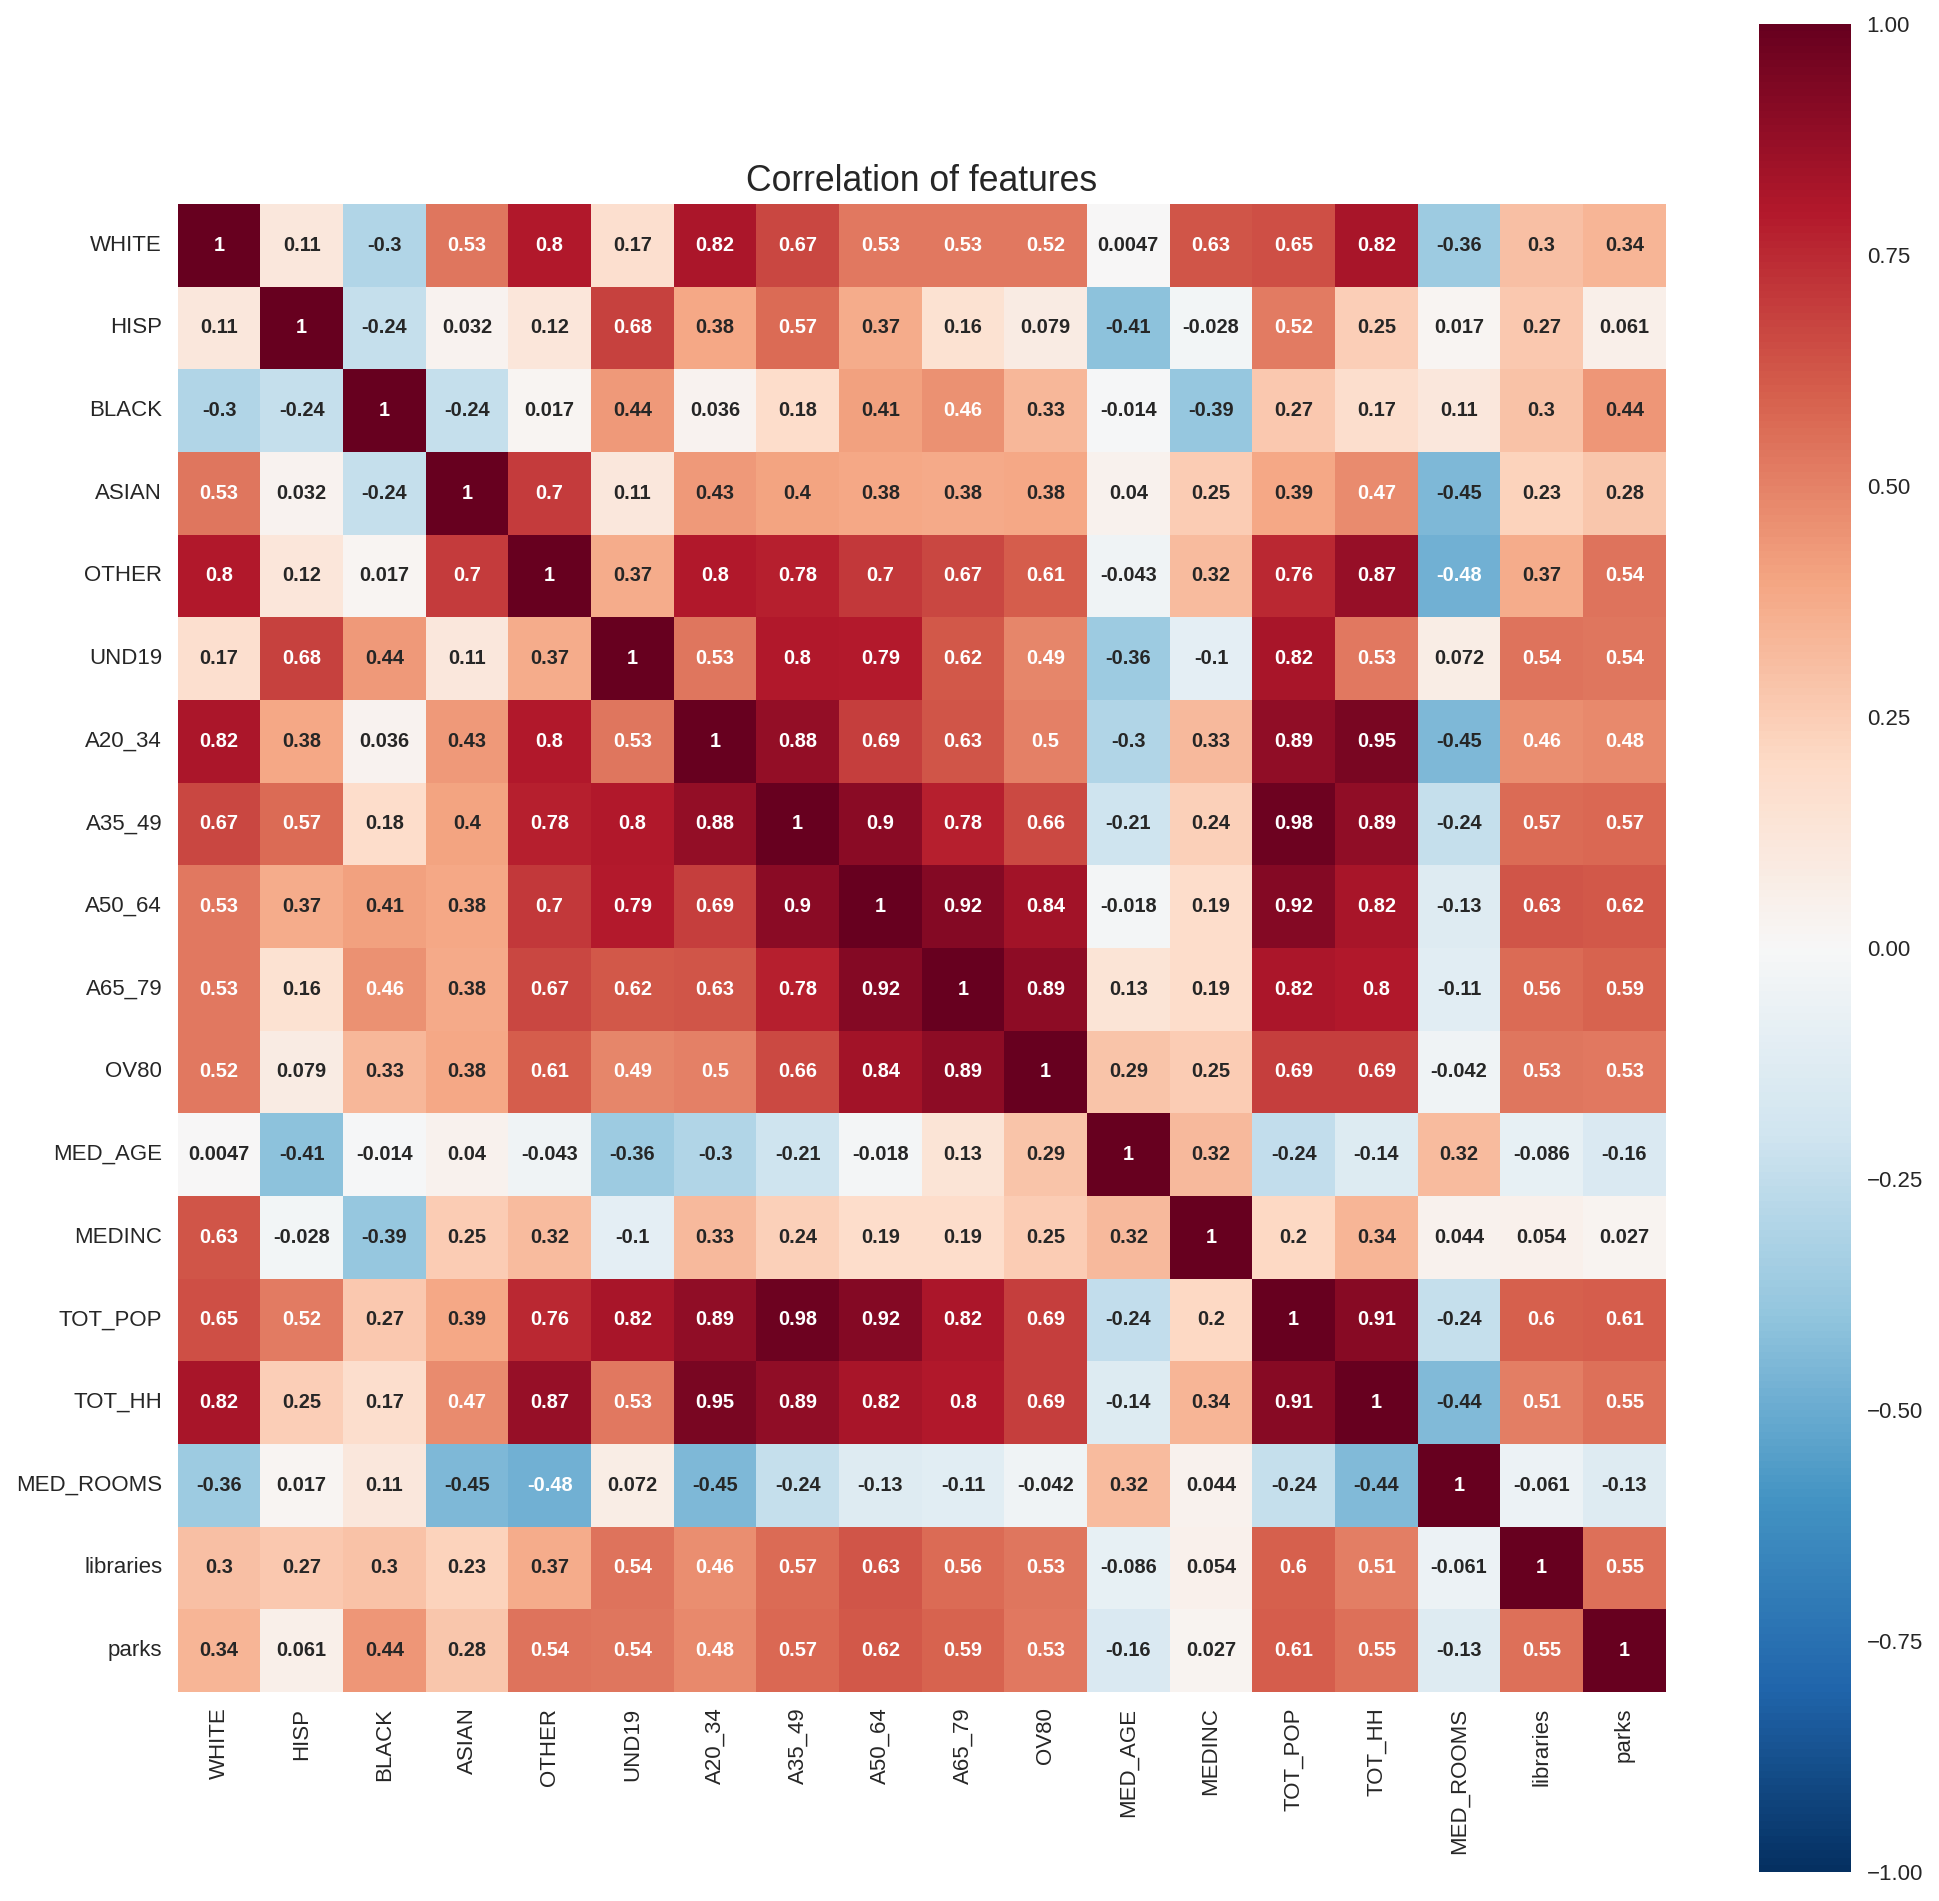

In [64]:
sel_columns=['WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER', 'UND19', 'A20_34',
       'A35_49', 'A50_64', 'A65_79', 'OV80', 'MED_AGE', 
#              'IN_LBFRC', 'EMP','UNEMP', 'NOT_IN_LBFRC', 'MED_HV', 'INC_LT_25K', 'INC_25_50K',
#        'INC_50_75K', 'INC_75_100K', 'INC_100_150K', 'INC_GT_150',
       'MEDINC',  'TOT_POP', 'TOT_HH', 'MED_ROOMS','libraries','parks']


plt.figure(figsize=(15, 15))
plt.title('Correlation of features', size=16)
sns.heatmap(
    ecodata15[sel_columns].corr(), vmax=1.0, vmin=-1.0, square=True, cmap='RdBu_r', linecolor='white',
    annot=True, annot_kws={'size': 9, 'weight': 'bold'}, 
)

plt.show()

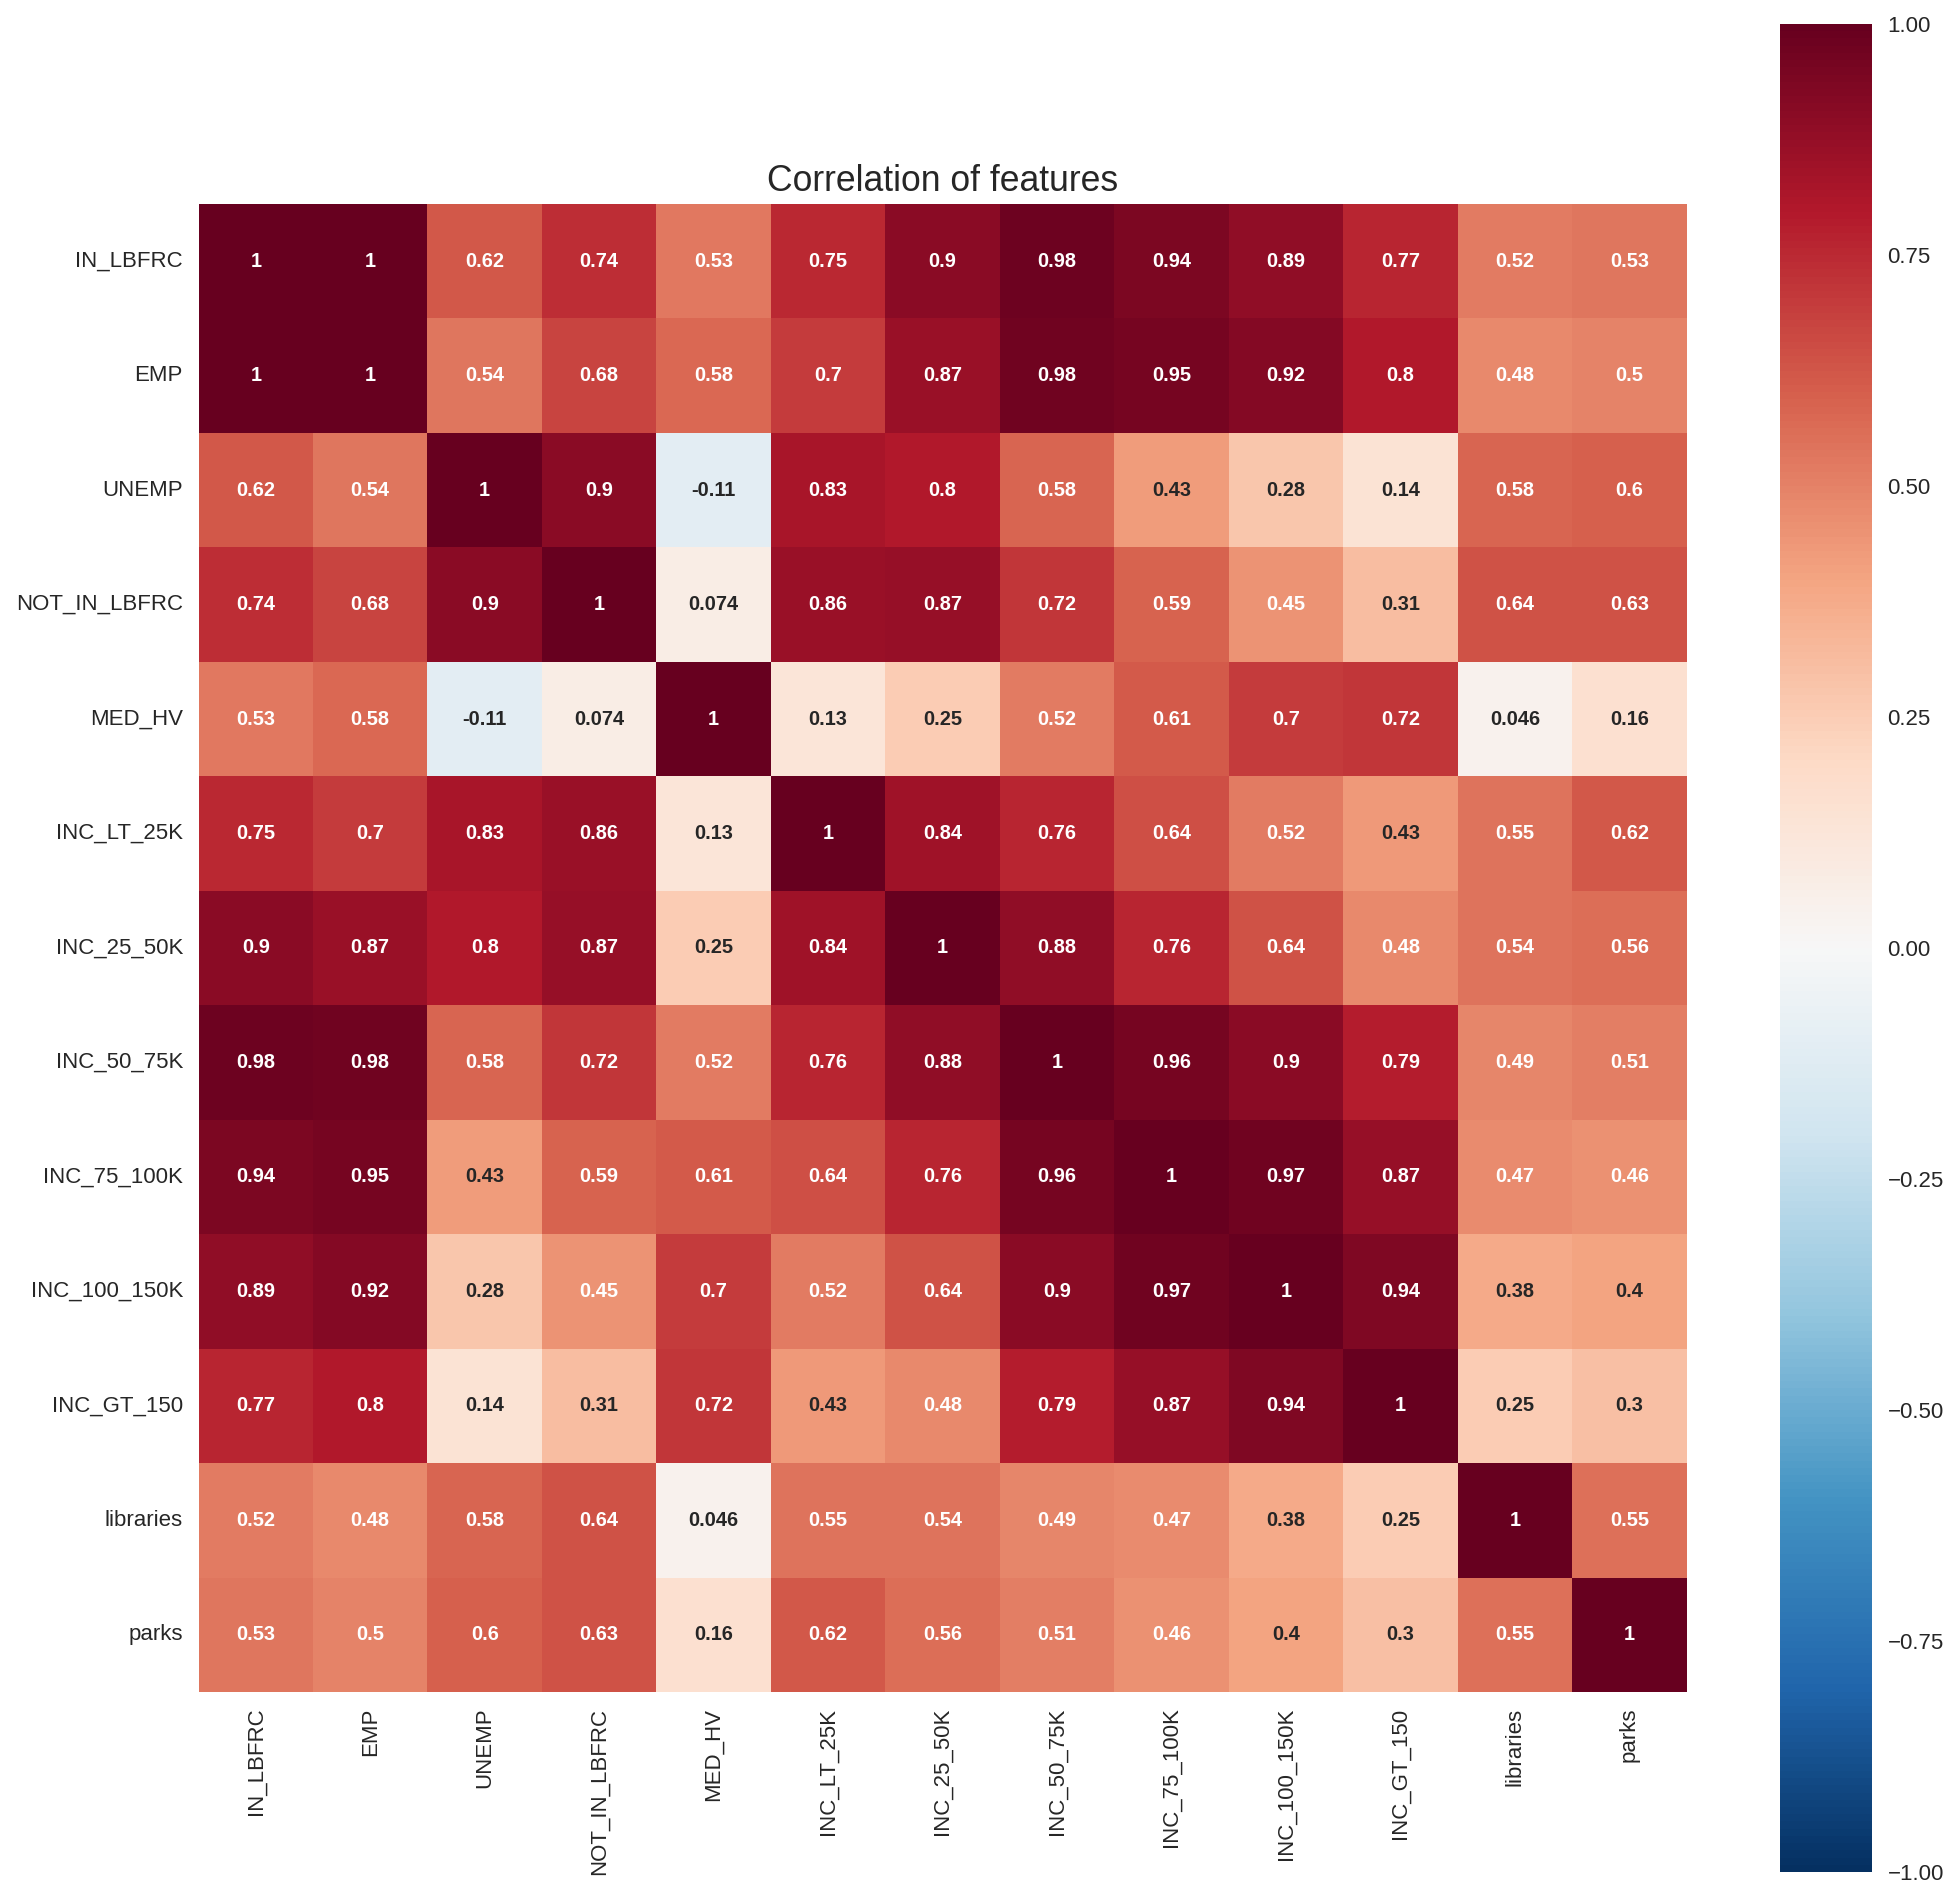

In [65]:
sel_columns=[
#     'WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER', 'UND19', 'A20_34',
#        'A35_49', 'A50_64', 'A65_79', 'OV80', 'MED_AGE', 
             'IN_LBFRC', 'EMP','UNEMP', 'NOT_IN_LBFRC', 'MED_HV', 'INC_LT_25K', 'INC_25_50K',
       'INC_50_75K', 'INC_75_100K', 'INC_100_150K', 'INC_GT_150',
#        'MEDINC',  'TOT_POP', 'TOT_HH', 'MED_ROOMS',
    'libraries','parks']


plt.figure(figsize=(15, 15))
plt.title('Correlation of features', size=16)
sns.heatmap(
    ecodata15[sel_columns].corr(), vmax=1.0, vmin=-1.0, square=True, cmap='RdBu_r', linecolor='white',
    annot=True, annot_kws={'size': 9, 'weight': 'bold'}, 
)

plt.show()

In [43]:
x=ecodata15[['TOT_POP']].values
y=ecodata15['libraries'].values.reshape(-1,1)
ols_noweight = spreg.OLS(y, x, name_y='libraries', name_x=['population'],  white_test=True)
print(ols_noweight.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   libraries                Number of Observations:          77
Mean dependent var  :      1.0390                Number of Variables   :           2
S.D. dependent var  :      0.7512                Degrees of Freedom    :          75
R-squared           :      0.3602
Adjusted R-squared  :      0.3516
Sum squared residual:     27.4377                F-statistic           :     42.2196
Sigma-square        :       0.366                Prob(F-statistic)     :   7.989e-09
S.E. of regression  :       0.605                Log likelihood        :     -69.531
Sigma-square ML     :       0.356                Akaike info criterion :     143.061
S.E of regression ML:      0.5969                Schwarz criterion     :     147.749

------------------------------------------------------------